In [8]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

# Load your data
X_train_small = pd.read_csv('X_train.csv')  # sample training set
X_test_scaled = pd.read_csv('X_test.csv')  # full test set
y_train_small = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Regularization hyperparameters (lambda values)
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]

# Results storage
ridge_results = []

In [17]:
# Setup
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

# Train a plain Linear Regression model
model = LinearRegression()
model.fit(X_train_small, y_train_small)

# Predict real values
y_train_pred_reg = model.predict(X_train_small)
y_test_pred_reg = model.predict(X_test_scaled)

# ROUND predictions to nearest integer class for classification evaluation
y_train_pred = np.clip(np.round(y_train_pred_reg), 0, 15).astype(int)
y_test_pred = np.clip(np.round(y_test_pred_reg), 0, 15).astype(int)

# Classification Metrics
train_accuracy = accuracy_score(y_train_small, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

# Regression Metrics
train_mse = mean_squared_error(y_train_small, y_train_pred_reg)
test_mse = mean_squared_error(y_test, y_test_pred_reg)
train_r2 = r2_score(y_train_small, y_train_pred_reg)
test_r2 = r2_score(y_test, y_test_pred_reg)

# Print all results
print("=== Baseline Linear Regression (No Regularization, No Transformations) ===")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

=== Baseline Linear Regression (No Regularization, No Transformations) ===
Train Accuracy: 0.2018
Test Accuracy: 0.2080
Precision: 0.2192
Recall: 0.2080
Train MSE: 5.2505
Test MSE: 5.4450
Train R²: 0.6441
Test R²: 0.6302


In [9]:
# Helper function to evaluate Ridge Regression
def evaluate_ridge(X_train, X_test, transformation_name):
    train_acc_list = []
    test_acc_list = []
    train_mse_list = []
    test_mse_list = []
    precision_list = []
    recall_list = []

    print(f"\n=== {transformation_name} ===")

    for alpha in alpha_values:
        model = Ridge(alpha=alpha, random_state=42)
        model.fit(X_train, y_train_small)

        # Predict real values
        y_train_pred_reg = model.predict(X_train)
        y_test_pred_reg = model.predict(X_test)

        # ROUND predictions to nearest integer class for classification
        y_train_pred = np.clip(np.round(y_train_pred_reg), 0, 15).astype(int)
        y_test_pred = np.clip(np.round(y_test_pred_reg), 0, 15).astype(int)

        # Metrics (classification)
        train_acc = accuracy_score(y_train_small, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

        # Metrics (regression)
        train_mse = mean_squared_error(y_train_small, y_train_pred_reg)
        test_mse = mean_squared_error(y_test, y_test_pred_reg)

        # Store everything
        ridge_results.append({
            'Transformation': transformation_name,
            'Alpha': alpha,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision': precision,
            'Recall': recall,
            'Train MSE': train_mse,
            'Test MSE': test_mse
        })

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        precision_list.append(precision)
        recall_list.append(recall)

    # Plot Training/Testing Accuracy
    plt.figure(figsize=(8,5))
    plt.plot(alpha_values, train_acc_list, marker='o', label='Training Accuracy')
    plt.plot(alpha_values, test_acc_list, marker='o', label='Testing Accuracy')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Accuracy')
    plt.title(f'Training vs Testing Accuracy: {transformation_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Training/Testing MSE
    plt.figure(figsize=(8,5))
    plt.plot(alpha_values, train_mse_list, marker='o', label='Training MSE')
    plt.plot(alpha_values, test_mse_list, marker='o', label='Testing MSE')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('MSE')
    plt.title(f'Training vs Testing MSE: {transformation_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Table
    prec_recall_table = pd.DataFrame({
        'Alpha': alpha_values,
        'Precision': precision_list,
        'Recall': recall_list
    })
    print(f"\nPrecision and Recall Table ({transformation_name}):")
    display(prec_recall_table)


=== No Transform ===


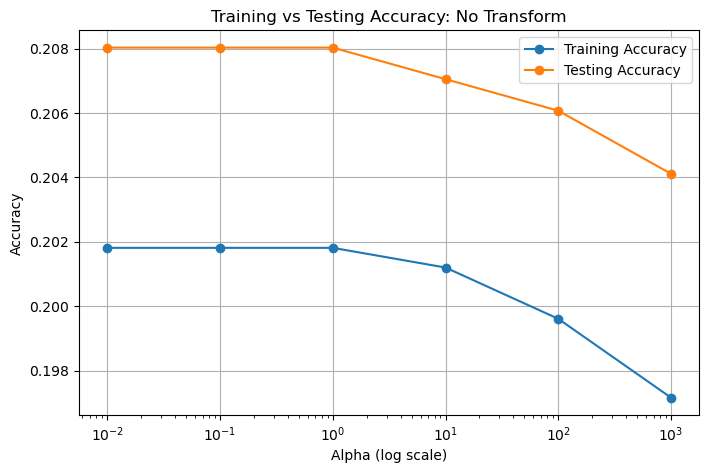

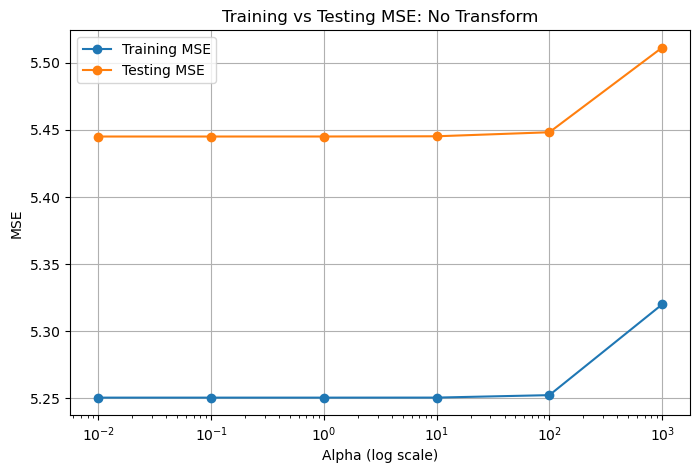


Precision and Recall Table (No Transform):


,Alpha,Precision,Recall
0,0.01,0.219241,0.208027
1,0.10,0.219241,0.208027
2,1.00,0.219241,0.208027
3,10.00,0.218576,0.207048
4,100.00,0.217507,0.206070
5,1000.00,0.211681,0.204112


In [10]:
evaluate_ridge(X_train_small, X_test_scaled, 'No Transform')


=== Polynomial Degree 2 ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.53077e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.69135e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=3.30668e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.48623e-19): result may not be accurate.
  return linalg.s

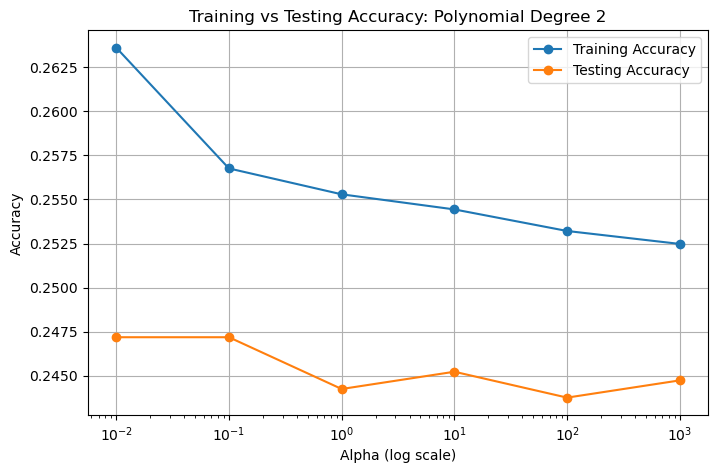

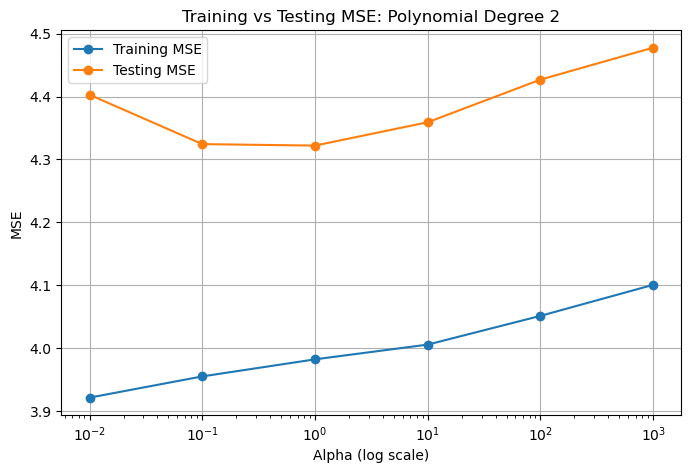


Precision and Recall Table (Polynomial Degree 2):


,Alpha,Precision,Recall
0,0.01,0.253664,0.247186
1,0.10,0.253185,0.247186
2,1.00,0.250603,0.244249
3,10.00,0.250742,0.245228
4,100.00,0.248962,0.243759
5,1000.00,0.250612,0.244738


In [11]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_small)
X_test_poly2 = poly2.transform(X_test_scaled)

evaluate_ridge(X_train_poly2, X_test_poly2, 'Polynomial Degree 2')


=== Polynomial Degree 3 ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.03564e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.85515e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.8408e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


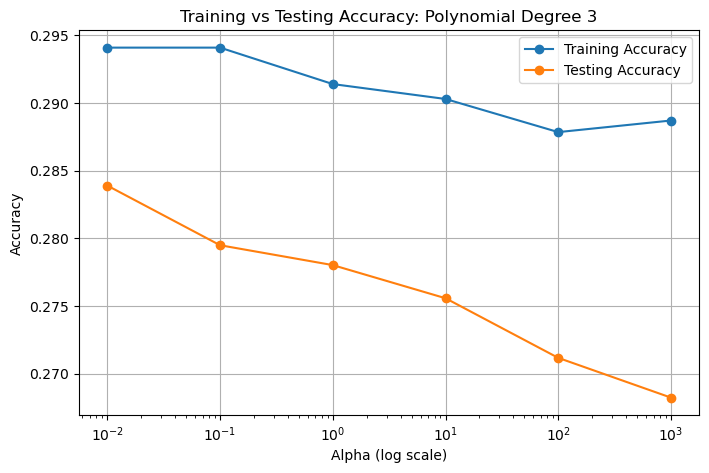

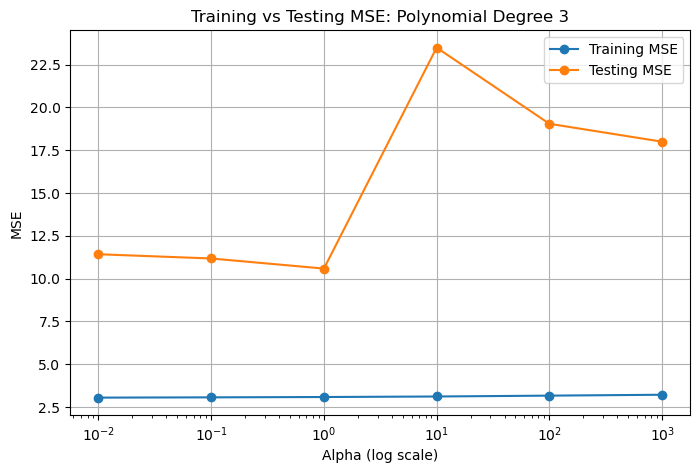


Precision and Recall Table (Polynomial Degree 3):


,Alpha,Precision,Recall
0,0.01,0.288070,0.283896
1,0.10,0.283428,0.279491
2,1.00,0.282503,0.278023
3,10.00,0.279382,0.275575
4,100.00,0.274798,0.271170
5,1000.00,0.271313,0.268233


In [12]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train_small)
X_test_poly3 = poly3.transform(X_test_scaled)

evaluate_ridge(X_train_poly3, X_test_poly3, 'Polynomial Degree 3')


=== Log Transform ===


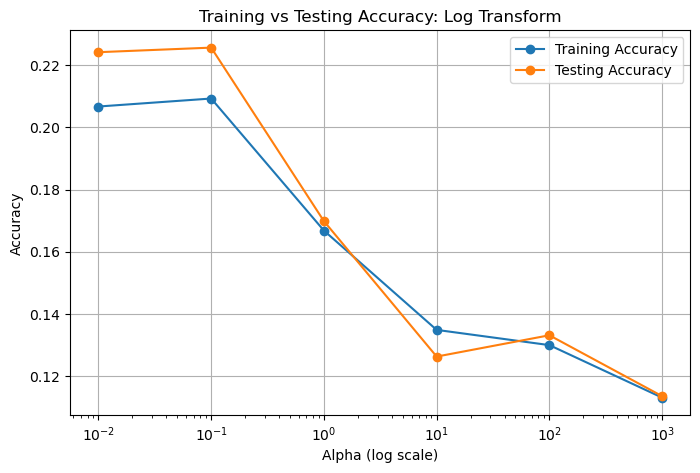

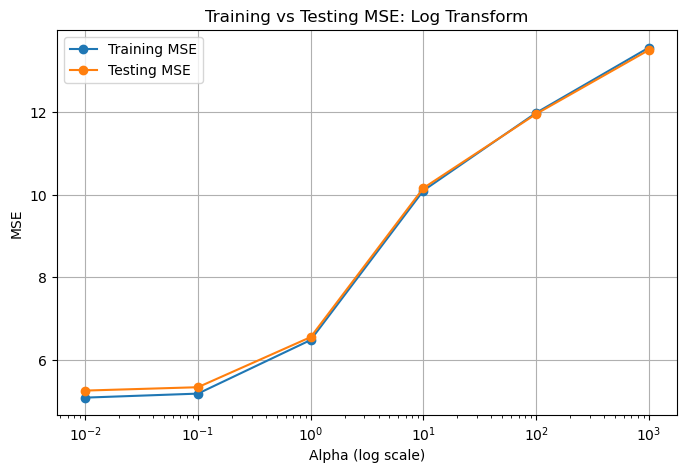


Precision and Recall Table (Log Transform):


,Alpha,Precision,Recall
0,0.01,0.234983,0.224180
1,0.10,0.237696,0.225649
2,1.00,0.181652,0.169848
3,10.00,0.104916,0.126285
4,100.00,0.106803,0.133138
5,1000.00,0.061630,0.113558


In [13]:
X_train_log = np.log(X_train_small + 1e-5 - np.min(X_train_small))
X_test_log = np.log(X_test_scaled + 1e-5 - np.min(X_train_small))

evaluate_ridge(X_train_log, X_test_log, 'Log Transform')


=== PCA Transform ===


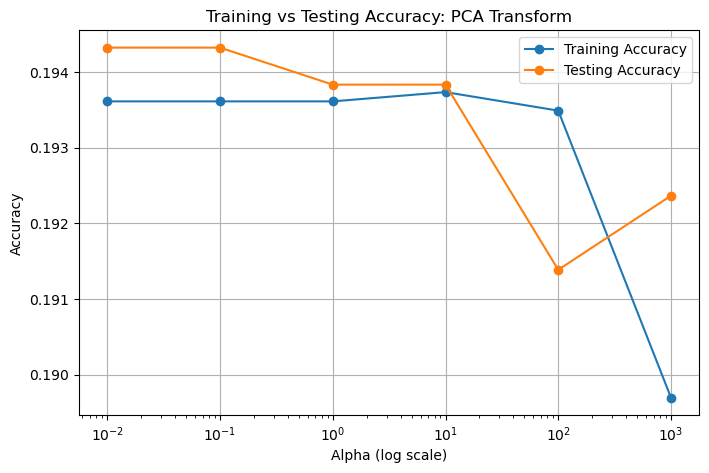

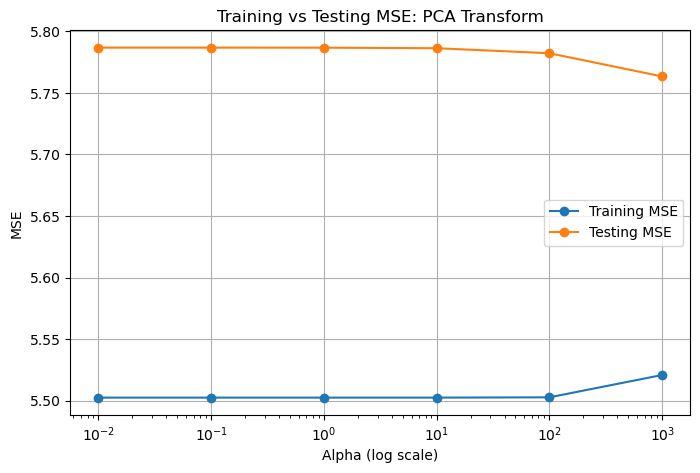


Precision and Recall Table (PCA Transform):


,Alpha,Precision,Recall
0,0.01,0.200956,0.194322
1,0.10,0.200956,0.194322
2,1.00,0.200656,0.193833
3,10.00,0.200691,0.193833
4,100.00,0.198922,0.191385
5,1000.00,0.200361,0.192364


In [14]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_scaled)

evaluate_ridge(X_train_pca, X_test_pca, 'PCA Transform')

In [16]:
# Final Results Table
ridge_results_df = pd.DataFrame(ridge_results)
from IPython.display import display
display(ridge_results_df)

# Optionally save
ridge_results_df.to_csv('ridge_final_metrics_results.csv', index=False)
print("Saved Ridge Regression metrics to 'ridge_final_metrics_results.csv'")

,Transformation,Alpha,Train Accuracy,Test Accuracy,Precision,Recall,Train MSE,Test MSE
0,No Transform,0.01,0.201811,0.208027,0.219241,0.208027,5.250507,5.444961
1,No Transform,0.10,0.201811,0.208027,0.219241,0.208027,5.250507,5.444962
2,No Transform,1.00,0.201811,0.208027,0.219241,0.208027,5.250507,5.444977
3,No Transform,10.00,0.201199,0.207048,0.218576,0.207048,5.250529,5.445141
4,No Transform,100.00,0.199608,0.206070,0.217507,0.206070,5.252357,5.448144
5,No Transform,1000.00,0.197161,0.204112,0.211681,0.204112,5.319903,5.511173
6,Polynomial Degree 2,0.01,0.263615,0.247186,0.253664,0.247186,3.921648,4.402743
7,Polynomial Degree 2,0.10,0.256762,0.247186,0.253185,0.247186,3.955360,4.324354
8,Polynomial Degree 2,1.00,0.255293,0.244249,0.250603,0.244249,3.982478,4.322044
9,Polynomial Degree 2,10.00,0.254436,0.245228,0.250742,0.245228,4.005889,4.359145


Saved Ridge Regression metrics to 'ridge_final_metrics_results.csv'
